In [12]:
import math
from random import randint
import numpy as np

0.Define a service time assigner and time between arrival assigner:

In [13]:
def service_time():
    m=randint(0,99)                  
    if m<=24:
        return 1
    elif 25<=m<=44:
        return 2
    elif 45<=m<=84:
        return 3
    else:
        return 4
    
def arrival_between():
    n=randint(0,99)                                         
    if n<=9:
        return 0
    elif 10<=n<=24:
        return 1
    elif 25<=n<=34:
        return 2
    elif 35<=n<=69:
        return 3
    elif 70<=n<=94:
        return 4
    else:
        return 5

1.Create empty lists for each of the 150 customers’ arrival times, service times, help start, help end, and wait times.

In [14]:
#insert 1 here
people=150 #people at the bank each day
arrival=[] #arrival time
service=[] #service time
helpstart=[] #help start time
helpend=[] #help end time
waittime=[] #wait time

2.Assume the first person arrives when the bank opens at t=0. Assign the first customer their arrival time, random service time, help start, help end, and wait time in each list. 

Hint 1: Use .append

Hint 2: For the random service time, you may want to refer back to the unfair die example in the craps notebook.

In [15]:
#insert 2
arrival.append(0) #assume the customer arrives when the bank opens
helpstart.append(0)#the customer gets helped right away at time t=0
waittime.append(0)#the first customer did not have to wait at all
service.append(service_time()) #assign first customer a service time
helpend.append(service[0]) #the customer finishes after their service time is over    

3.Give all of the other customers their random service times.

Hint: You'll want to use a for loop.

In [16]:
for person in range(1,people): #you already gave the first person their values so start at 1 not 0      
    service.append(service_time())

4.Give all of the other customers their random times between arrivals.

Hint: You'll want to use a for loop and once again refer back to the unfair die example.

In [17]:
for person in range(1,people): #you already gave the first person their values so start at 1 not 0
# a person's arrival time is going to be obtained from adding the
# last person's arrival time to the random time between arrivals
    arrival.append(arrival_between()+arrival[person-1])

5.Update each customer’s help start, help end, and wait times. You will need to update differently depending on whether the next customer arrived before or after the last person’s service finished. 

Hint: You will need an if/else statement within a for loop.

In [18]:
for person in range(1,people):                              #you already serviced the first person so start at 1 not 0
    if arrival[person]>=helpend[person-1]:                  #if the next customer arrives after the last customer is finished, 
        helpstart.append(arrival[person])                   #then the next customer gets helped right away as soon as they arrive       
        helpend.append(helpstart[person]+service[person])   #and his/her end time is their arrival time plus their service time
        waittime.append(0)                                  #and they didn't have to wait at all
    else:                                                   #if the next customer arrives before the last customer is finished,
        helpstart.append(helpend[person-1])                 #then the next customer gets helped when the customer before he/she finishes
        helpend.append(helpstart[person]+service[person])   #and his/her end time is their service time plus when they started getting helped
        waittime.append(helpstart[person]-arrival[person])  #and they had to wait the difference between when they arrived and were helped

6.Calculate the average wait time on this day.

Hint: if you import numpy then you can use np.mean(wait_time).

In [19]:
print('average wait time = ', np.mean(waittime))

average wait time =  5.413333333333333


7.Simulate 10,000 days to calculate the average wait time.

Hint 1: you'll need an outer loop (corresponding to each day) with all of the previous stuff inside it. 

Hint 2: Make sure to clear the lists each time you start a new day by setting them equal to empty brackets (ex: wait_time = []). 

Hint 3: Create an additional list called total_waittime that keeps track of each day's wait time and then you can find the average of this list at the very end.

Hint 4: The answer should be approximately 4.9 mins.


In [20]:
days = 10000
people=150 #people at the bank each day
total_waittime = []

for day in range(days):
    
    #you need to clear these lists for each new day
    arrival=[] #arrival time
    service=[] #service time
    helpstart=[] #help start time
    helpend=[] #help end time
    waittime=[] #wait time
    
    #-----------------------------------
    # give the very first customer his/her arrival and service time
    #-----------------------------------
    arrival.append(0) #the customer arrives when the bank opens
    helpstart.append(0)#the customer gets helped right away at time t=0
    waittime.append(0)#the first customer did not have to wait at all
    service.append(service_time()) #randomly assign first customer service time                                    
    helpend.append(service[0]) #the customer finishes after their service time is over  
    
    #-----------------------------------
    #give all of the other customers arrival and service times
    #-----------------------------------
    for person in range(1,people):
    #-----------------------------------
    #set up arrival time probabilities:
    #-----------------------------------
        arrival.append(arrival_between()+arrival[person-1])
    #-----------------------------------
    #set up service time probabilities:
    #-----------------------------------        
        service.append(service_time())
    #-----------------------------------
    #service all of the other customers
    #-----------------------------------
    for person in range(1,people):
        if arrival[person]>=helpend[person-1]:                  #if the next customer arrives after the last customer is finished, 
            helpstart.append(arrival[person])                   #then the next customer gets helped right away       
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their arrival time plus their service time
            waittime.append(0)                                  #and they didn't have to wait at all
        else:                                                   #if the next customer arrives before the last customer is finished,
            helpstart.append(helpend[person-1])                 #then the next customer gets helped when the customer before he/her finishes
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their service time plus when they started getting helped
            waittime.append(helpstart[person]-arrival[person])  #and they had to wait the difference between when the arrived and were helped

    total_waittime.append(sum(waittime)/len(waittime))
    
print('average wait time = ', np.mean(total_waittime))


average wait time =  4.883222666666667


8.What was the longest wait time?

Hint: max is a built-in function for lists

In [21]:
max(total_waittime)

31.02

9.Plot the day versus the day's wait time.

Hint: You can make a list of 10,000 days quickly using the range function.

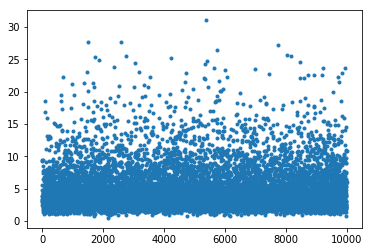

In [22]:
days = range(10000)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(days, total_waittime,'.')

10.Play around with changing the probability distributions for service time and time between arrivals until your average wait time is less than 2 minutes.

### One possible solutions for getting wait times under 2 mins:
Reducing 4 min service times to 3 mins reduces to the average wait time to 2.6.

How could we reduce these service times? Train the staff better of perhaps do these longer transactions online.

In addition, increasing 0 min between arrivals to 1 min reduces the average wait time further to 1.6.

How could we make sure that no two people get in line at the same time? Maybe set up a coffee station to distract people for a minute.

We change the arrival and service time probabilities in the cell below to reflect these changes:

In [23]:
def service_time():
    m=randint(0,99)                  
    if m<=24:
        return 1
    elif 25<=m<=44:
        return 2
    else:
        return 3
    
def arrival_between():
    n=randint(0,99)  
    if n<=24:
        return 1
    elif 25<=n<=34:
        return 2
    elif 35<=n<=69:
        return 3
    elif 70<=n<=94:
        return 4
    else:
        return 5
    
days = 10000
people=150 #people at the bank each day
total_waittime = []

for day in range(days):
    
    #you need to clear these lists for each new day
    arrival=[] #arrival time
    service=[] #service time
    helpstart=[] #help start time
    helpend=[] #help end time
    waittime=[] #wait time
    
    #-----------------------------------
    # give the very first customer his/her arrival and service time
    #-----------------------------------
    arrival.append(0) #the customer arrives when the bank opens
    helpstart.append(0)#the customer gets helped right away at time t=0
    waittime.append(0)#the first customer did not have to wait at all
    service.append(service_time()) #randomly assign first customer service time                                    
    helpend.append(service[0]) #the customer finishes after their service time is over  
    
    #-----------------------------------
    #give all of the other customers arrival and service times
    #-----------------------------------
    for person in range(1,people):
    #-----------------------------------
    #set up arrival time probabilities:
    #-----------------------------------
        arrival.append(arrival_between()+arrival[person-1])
    #-----------------------------------
    #set up service time probabilities:
    #-----------------------------------        
        service.append(service_time())
    #-----------------------------------
    #service all of the other customers
    #-----------------------------------
    for person in range(1,people):
        if arrival[person]>=helpend[person-1]:                  #if the next customer arrives after the last customer is finished, 
            helpstart.append(arrival[person])                   #then the next customer gets helped right away       
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their arrival time plus their service time
            waittime.append(0)                                  #and they didn't have to wait at all
        else:                                                   #if the next customer arrives before the last customer is finished,
            helpstart.append(helpend[person-1])                 #then the next customer gets helped when the customer before he/her finishes
            helpend.append(helpstart[person]+service[person])   #and his/her end time is their service time plus when they started getting helped
            waittime.append(helpstart[person]-arrival[person])  #and they had to wait the difference between when the arrived and were helped

    total_waittime.append(sum(waittime)/len(waittime))
    
print('average wait time = ', np.mean(total_waittime))


average wait time =  1.5809866666666668


### Challenge: Adding a second teller (Thanks to Alberto Adatto!) (this may be right?)

In [24]:
import random
import numpy as np


daily_avg_wait_time = []

def customerArrived():
    
    arrived = random.randint(0,99)
    
    if 0 <= arrived < 10:
        arrival_time.append(0)  
        
    elif 10 <= arrived < 25:
        arrival_time.append(1)
       
    elif 25 <= arrived < 35:
        arrival_time.append(2)
      
    elif 35 <= arrived < 70:
        arrival_time.append(3)
       
    elif 70 <= arrived < 95:
        arrival_time.append(4)
       
    elif 95 <= arrived < 100:
        arrival_time.append(5)
        
        
def serviceTime():
    
    timeServed = random.randint(0,99)
    if 0 <= timeServed < 25:
        service_time.append(1)
        
    elif 25 <= timeServed < 45:
        service_time.append(2)
        
    elif 45 <= timeServed < 85:
        service_time.append(3)
      
    elif 85 <= timeServed < 100:
        service_time.append(4)
         
def waitTime(n):
    for i in range(1,n):
  
        wait = service_time[i-1]+wait_time[i-1]-arrival_time[i]
   
        #######################################################################################
        ##############          Code for Second Teller             ############################
        if wait > 0:# and i <= 75:
            wait = service_time[i-2]+wait_time[i-2]-arrival_time[i-1]-arrival_time[i]
        #######################################################################################
    
        if wait <= 0:
            wait_time.append(0)
        else:
            wait_time.append(wait)
    
for days in range(1000):
    arrival_time = []
    service_time = []
    wait_time = [0]
    customers = 150
    for i in range(customers):
        customerArrived() 
        serviceTime()  

    waitTime(customers)
    
    daily_avg_wait_time.append(np.mean(wait_time))
    
print('average wait time after 1000 days: ', np.mean(daily_avg_wait_time))

average wait time after 1000 days:  0.12107333333333334


### Challenge: Greg Drugan's solution

In [ ]:
#insert attached key